In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import matthews_corrcoef
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
np.random.seed(7)
from keras.utils import pad_sequences

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


2023-04-28 16:29:56.847766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 16:30:05.180072: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sanju/ns-allinone-2.35/otcl-1.14:/home/sanju/ns-allinone-2.35/lib
2023-04-28 16:30:05.180173: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-28 16:30:24.931574: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7';

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3894133669641828795
xla_global_id: -1
]


2023-04-28 16:30:49.524554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 16:30:49.795082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-04-28 16:30:49.795320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sanju-HP-Notebook): /proc/driver/nvidia/version does not exist


In [4]:
X=[]
y=[]
base_path='dataset1/'
source_path=base_path
for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data=pd.read_csv(file_path,header=None)
            data=data.to_numpy()
            X.append(data)
            y.append(child)           

dataset1/0/1-13.csv
dataset1/0/1-23.csv
dataset1/0/1-12.csv
dataset1/0/1-3.csv
dataset1/0/1-4.csv
dataset1/0/1-17.csv
dataset1/0/1-28.csv
dataset1/0/1-11.csv
dataset1/0/1-27.csv
dataset1/0/1-14.csv
dataset1/0/1-18.csv
dataset1/0/1-19.csv
dataset1/0/1-8.csv
dataset1/0/1-25.csv
dataset1/0/1-22.csv
dataset1/0/1-2.csv
dataset1/0/1-7.csv
dataset1/0/1-24.csv
dataset1/0/1-31.csv
dataset1/0/1-21.csv
dataset1/0/1-5.csv
dataset1/0/1-15.csv
dataset1/0/1-16.csv
dataset1/0/1-20.csv
dataset1/0/1-1.csv
dataset1/0/1-6.csv
dataset1/0/1-10.csv
dataset1/0/1-30.csv
dataset1/0/1-32.csv
dataset1/0/1-29.csv
dataset1/0/1-9.csv
dataset1/0/1-26.csv
dataset1/1/8.csv
dataset1/1/5.csv
dataset1/1/13.csv
dataset1/1/14.csv
dataset1/1/24.csv
dataset1/1/10.csv
dataset1/1/9.csv
dataset1/1/17.csv
dataset1/1/1.csv
dataset1/1/3.csv
dataset1/1/6.csv
dataset1/1/29.csv
dataset1/1/28.csv
dataset1/1/26.csv
dataset1/1/18.csv
dataset1/1/30.csv
dataset1/1/7.csv
dataset1/1/22.csv
dataset1/1/23.csv
dataset1/1/21.csv
dataset1/1/16.cs

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [35]:
max_review_length = 100
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [36]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [37]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [38]:
modelClass = Sequential()
modelClass.add(LSTM(100, return_sequences=True, input_shape=(100,64)))
modelClass.add(LSTM(50, return_sequences=True, activation='relu'))
modelClass.add(LSTM(20, return_sequences=True, activation='relu'))
modelClass.add(LSTM(10, activation='relu'))
modelClass.add(Dense(1, activation='sigmoid'))
modelClass.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(modelClass.summary())
modelClass.fit(X_train, y_train, epochs=20, batch_size=16)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          66000     
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           30200     
                                                                 
 lstm_6 (LSTM)               (None, 100, 20)           5680      
                                                                 
 lstm_7 (LSTM)               (None, 10)                1240      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 103,131
Trainable params: 103,131
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
3/3 [===========================

In [39]:
scores = modelClass.evaluate(X_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 67.39%


In [40]:
y_pred = (modelClass.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 1s 758ms/step


In [41]:
print(y_pred)

[[1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [42]:
print(y_test)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [54]:
cm = confusion_matrix(y_test,y_pred)

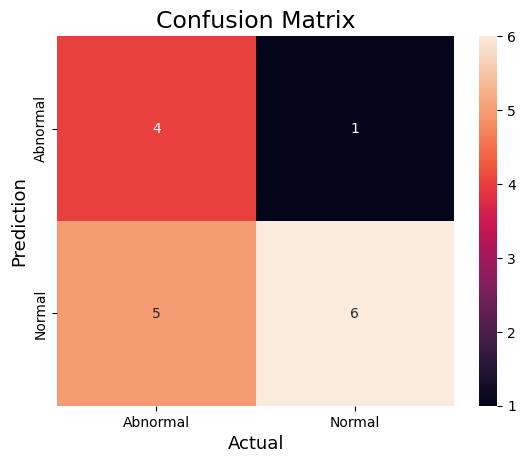

In [55]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Abnormal', 'Normal'],
            yticklabels=['Abnormal', 'Normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [56]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.857


In [57]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.545


In [58]:
print(matthews_corrcoef(y_test, y_pred))

0.32277655457716287


In [59]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [60]:
fpr1, tpr1, thresholds_keras = roc_curve(y_test, y_pred)

Text(0, 0.5, 'True Positive rate')

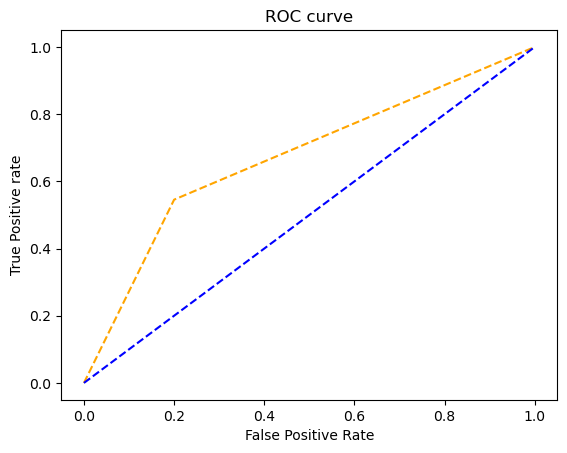

In [61]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LSTM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

In [51]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

0.6727272727272727


In [24]:
y

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

In [32]:
y.count('1')

30

In [33]:
y.count('0')

32